<a href="https://colab.research.google.com/github/MLGus/transfer-learning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2025-02-23 21:27:39--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.47.166.62, 2600:1408:7:1a9::317f, 2600:1408:7:1b9::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.47.166.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/gatos-e-cachorros.zip’

/tmp/gatos-e-cachor 100%[===================>] 786.67M   166MB/s    in 7.0s    

2025-02-23 21:27:46 (112 MB/s) - ‘/tmp/gatos-e-cachorros.zip’ saved [824887076/824887076]

12501
12501


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 83/100 ━━━━━━━━━━━━━━━━━━━━ 1:47 6s/step - accuracy: 0.5238 - loss: 0.7743

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


 90/100 ━━━━━━━━━━━━━━━━━━━━ 1:02 6s/step - accuracy: 0.5263 - loss: 0.7687

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 590s 6s/step - accuracy: 0.5296 - loss: 0.7620 - val_accuracy: 0.6220 - val_loss: 0.6368
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 622s 6s/step - accuracy: 0.6627 - loss: 0.6133 - val_accuracy: 0.6773 - val_loss: 0.5843
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 683s 6s/step - accuracy: 0.7167 - loss: 0.5559 - val_accuracy: 0.7353 - val_loss: 0.5185
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 625s 6s/step - accuracy: 0.7492 - loss: 0.5081 - val_accuracy: 0.7167 - val_loss: 0.5485
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 618s 6s/step - accuracy: 0.7655 - loss: 0.4857 - val_accuracy: 0.7960 - val_loss: 0.4416
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 591s 6s/step - accuracy: 0.7863 - loss: 0.4536 - val_accuracy: 0.7907 - val_loss: 0.4362
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 621s 6s/step - accuracy: 0.8008 - loss: 0.4280 - val_accuracy: 0.6047 - val_loss: 0.6483
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 622s 6s/step - accuracy: 0.8032 - loss: 0.4141 - val_accuracy: 0.806

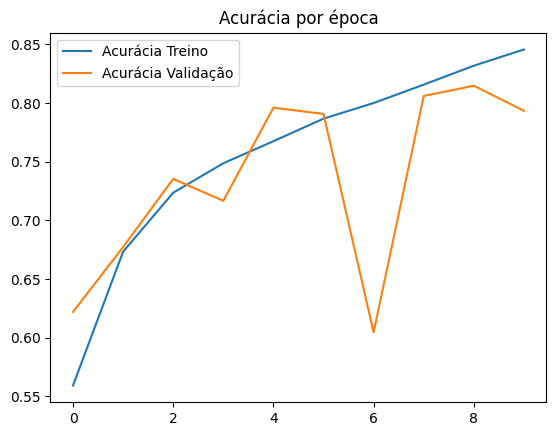

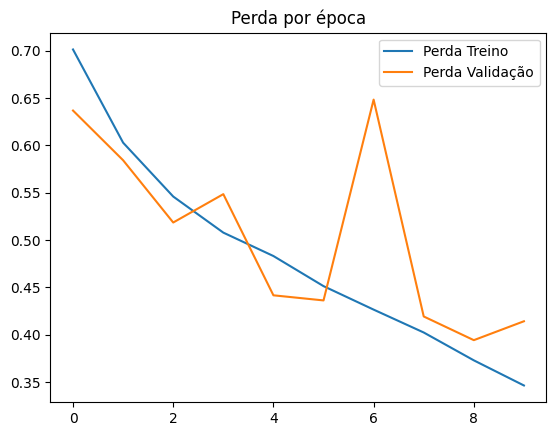

Saving pexels-bertellifotografia-1906153.jpg to pexels-bertellifotografia-1906153.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
pexels-bertellifotografia-1906153.jpg é um gato


In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Baixando o dataset
!wget --no-check-certificate \
       https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip \
       -O /tmp/gatos-e-cachorros.zip

# Extraindo os arquivos
caminho_zip = '/tmp/gatos-e-cachorros.zip'
zip_ref = zipfile.ZipFile(caminho_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Criando diretórios para treino e teste
try:
    os.makedirs('/tmp/gatos-vs-cachorros/treino/gatos')
    os.makedirs('/tmp/gatos-vs-cachorros/treino/cachorros')
    os.makedirs('/tmp/gatos-vs-cachorros/teste/gatos')
    os.makedirs('/tmp/gatos-vs-cachorros/teste/cachorros')
except OSError:
    pass

def dividir_dados(origem, treino, teste, proporcao):
    arquivos = [f for f in os.listdir(origem) if os.path.getsize(os.path.join(origem, f)) > 0]

    tamanho_treino = int(len(arquivos) * proporcao)
    conjunto_embaralhado = random.sample(arquivos, len(arquivos))
    conjunto_treino = conjunto_embaralhado[:tamanho_treino]
    conjunto_teste = conjunto_embaralhado[tamanho_treino:]

    for arquivo in conjunto_treino:
        copyfile(os.path.join(origem, arquivo), os.path.join(treino, arquivo))
    for arquivo in conjunto_teste:
        copyfile(os.path.join(origem, arquivo), os.path.join(teste, arquivo))

# Definindo diretórios
DIR_GATOS_ORIGEM = "/tmp/PetImages/Cat/"
DIR_GATOS_TREINO = "/tmp/gatos-vs-cachorros/treino/gatos/"
DIR_GATOS_TESTE = "/tmp/gatos-vs-cachorros/teste/gatos/"
DIR_CACHORROS_ORIGEM = "/tmp/PetImages/Dog/"
DIR_CACHORROS_TREINO = "/tmp/gatos-vs-cachorros/treino/cachorros/"
DIR_CACHORROS_TESTE = "/tmp/gatos-vs-cachorros/teste/cachorros/"

dividir_dados(DIR_GATOS_ORIGEM, DIR_GATOS_TREINO, DIR_GATOS_TESTE, 0.9)
dividir_dados(DIR_CACHORROS_ORIGEM, DIR_CACHORROS_TREINO, DIR_CACHORROS_TESTE, 0.9)

# Criando o modelo de rede neural
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

modelo.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Geradores de dados
DIR_TREINO = "/tmp/gatos-vs-cachorros/treino/"
dir_teste = "/tmp/gatos-vs-cachorros/teste/"

gerador_treino = ImageDataGenerator(rescale=1.0/255.)
gerador_validacao = ImageDataGenerator(rescale=1.0/255.)

gerador_treino = gerador_treino.flow_from_directory(DIR_TREINO, batch_size=250, class_mode='binary', target_size=(150, 150))
gerador_validacao = gerador_validacao.flow_from_directory(dir_teste, batch_size=250, class_mode='binary', target_size=(150, 150))

# Treinamento do modelo
historico = modelo.fit(gerador_treino, epochs=10, steps_per_epoch=100, validation_data=gerador_validacao, validation_steps=6)

# Plotando métricas de treino
plt.plot(historico.history['accuracy'], label='Acurácia Treino')
plt.plot(historico.history['val_accuracy'], label='Acurácia Validação')
plt.legend()
plt.title('Acurácia por época')
plt.show()

plt.plot(historico.history['loss'], label='Perda Treino')
plt.plot(historico.history['val_loss'], label='Perda Validação')
plt.legend()
plt.title('Perda por época')
plt.show()

# Classificação de uma imagem carregada pelo usuário
from google.colab import files
uploaded = files.upload()

for nome_arquivo in uploaded.keys():
    caminho = '/content/' + nome_arquivo
    img = image.load_img(caminho, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    resultado = modelo.predict(img_array)
    print(f"{nome_arquivo} é um {'cachorro' if resultado[0] > 0.5 else 'gato'}")

In [ ]:
# Classificação de uma imagem carregada pelo usuário
from google.colab import files
uploaded = files.upload()

for nome_arquivo in uploaded.keys():
    caminho = '/content/' + nome_arquivo
    img = image.load_img(caminho, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    resultado = modelo.predict(img_array)
    print(f"{nome_arquivo} é um {'cachorro' if resultado[0] > 0.5 else 'gato'}")